# Simulation 9 - Plotting NS3 Results

TJ Kim
8/13/20

Take CSV from youngbin and plot.

In [1]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab



# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim9")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *
from Cloud_PlanGenerator import *

In [2]:
import pandas as pd
data = pd.read_csv(os.path.curdir + "/sim_store/sim9/ICNP_results.csv", error_bad_lines=False)

In [3]:
data

,Plan1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Plan2,Unnamed: 5,Unnamed: 6,Unnamed: 7,Plan3,Unnamed: 9,Unnamed: 10,Unnamed: 11,Plan4,Unnamed: 13,Unnamed: 14
0,0,0,2.55398,NaN,0,0,2.55398,NaN,0,0,2.55398,NaN,0,0,2.55398
1,0,1,2.55366,NaN,0,1,2.55366,NaN,0,1,2.55366,NaN,0,1,2.55366
2,0,2,2.55301,NaN,0,2,2.55301,NaN,0,2,2.55301,NaN,0,2,2.55301
3,0,3,2.55313,NaN,0,3,2.55313,NaN,0,3,2.55313,NaN,0,3,2.55313
4,0,4,2.55359,NaN,0,4,2.55359,NaN,0,4,2.55359,NaN,0,4,2.55359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9,15,3.82233,NaN,9,15,2.50733,NaN,9,15,2.50733,NaN,9,15,5.49733
196,9,16,3.82453,NaN,9,16,2.55353,NaN,9,16,2.55353,NaN,9,16,6.46853
197,9,17,3.82895,NaN,9,17,2.10995,NaN,9,17,2.10995,NaN,9,17,9.25895
198,9,18,2.10971,NaN,9,18,2.55371,NaN,9,18,2.55371,NaN,9,18,2.10971


### Timestep vs. transmission time

Plot transmission time for each plan per timestep.

In [51]:
# Obtain all the plans transmission time
batch_seconds = pd.DataFrame.to_numpy(data["Unnamed: 6"])
SG_seconds = pd.DataFrame.to_numpy(data["Unnamed: 2"])
Myopic_seconds = pd.DataFrame.to_numpy(data["Unnamed: 10"])
Naive_seconds = pd.DataFrame.to_numpy(data["Unnamed: 14"])

# Pring All the plan average seconds
thresh = 10
print("Batch mean (s):", np.mean(batch_seconds[batch_seconds<thresh]))
print("SG mean (s):", np.mean(SG_seconds[SG_seconds<thresh]))
print("Myopic mean (s):", np.mean(Myopic_seconds[Myopic_seconds<thresh]))
print("Naive mean (s):", np.mean(Naive_seconds[Naive_seconds<thresh]))

# print("Batch mean (s):", np.mean(batch_seconds))
# print("SG mean (s):", np.mean(SG_seconds))
# print("Myopic mean (s):", np.mean(Myopic_seconds))
# print("Naive mean (s):", np.mean(Naive_seconds))

Batch mean (s): 2.6535706532663323
SG mean (s): 3.2092938383838385
Myopic mean (s): 3.1139408585858592
Naive mean (s): 3.9710411855670107


In [52]:
print("batch min:", np.min(batch_seconds), ", max:", np.max(batch_seconds))
print("SG min:", np.min(SG_seconds), ", max:", np.max(SG_seconds))
print("Myopic min:", np.min(Myopic_seconds), ", max:", np.max(Myopic_seconds))
print("Naive min:", np.min(Naive_seconds), ", max:", np.max(Naive_seconds))

batch min: 2.1090400000000002 , max: 11.1105
SG min: 2.1090400000000002 , max: 11.4867
Myopic min: 2.10902 , max: 21.2604
Naive min: 2.10906 , max: 23.7823


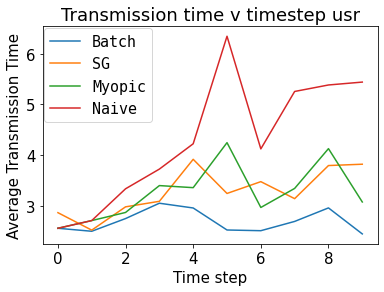

In [53]:
from matplotlib.pyplot import figure


# Get time steps
timesteps = pd.DataFrame.to_numpy(data["Plan1"])
temp_ts = {}


for i in range(10):
    temp_ts[i] = np.where(timesteps == i)

plans = {}
plans[0] = []
plans[1] = []
plans[2] = []
plans[3] = []

batch_seconds = pd.DataFrame.to_numpy(data["Unnamed: 6"])
SG_seconds = pd.DataFrame.to_numpy(data["Unnamed: 2"])
Myopic_seconds = pd.DataFrame.to_numpy(data["Unnamed: 10"])
Naive_seconds = pd.DataFrame.to_numpy(data["Unnamed: 14"])

seconds = {}
seconds[0] = SG_seconds
seconds[1] = batch_seconds
seconds[2] = Myopic_seconds
seconds[3] = Naive_seconds

for p in range(4):
    for t in range(10):
        plans[p] += [np.mean(seconds[p][temp_ts[t]])]

plt.figure()
plt.plot(range(10), plans[1], label = 'Batch')
plt.plot(range(10), plans[0], label = 'SG')
plt.plot(range(10), plans[2], label = 'Myopic')
plt.plot(range(10), plans[3], label = 'Naive')

plt.ylabel('Average Transmission Time')
plt.title('Transmission time v timestep usr')
plt.xlabel('Time step')
plt.legend(borderaxespad=0.1,prop={'family': 'DejaVu Sans Mono'})



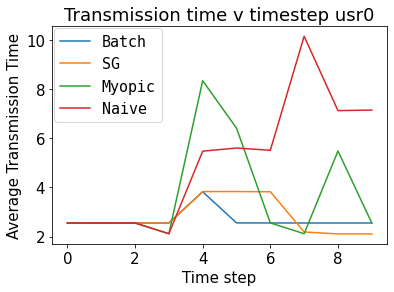

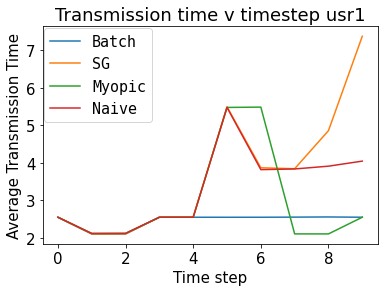

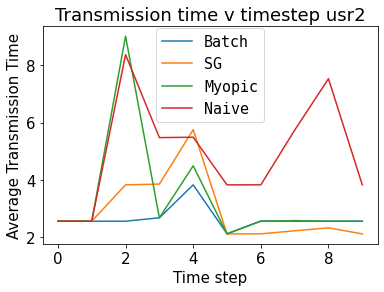

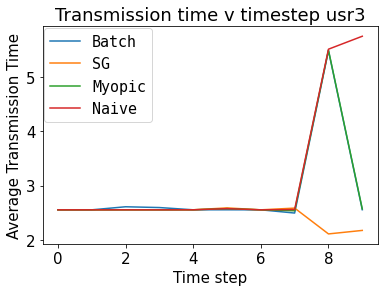

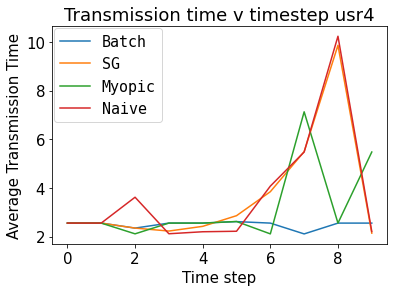

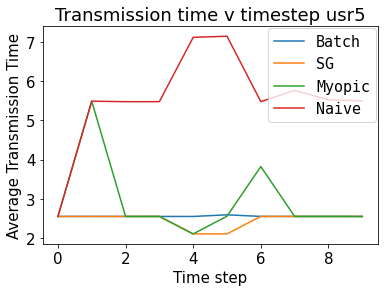

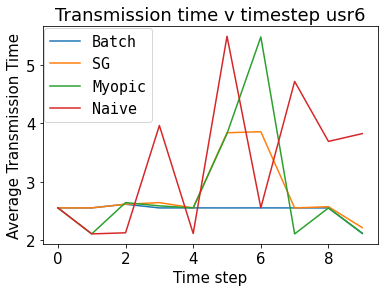

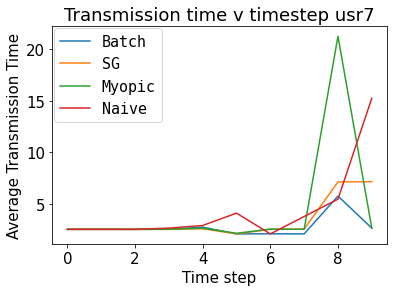

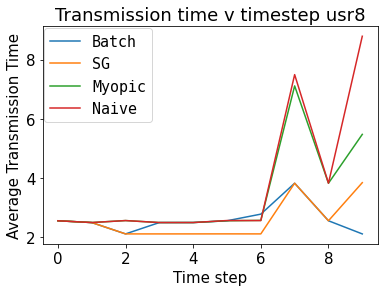

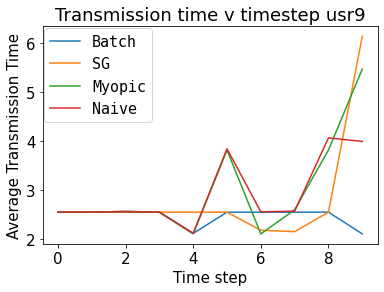

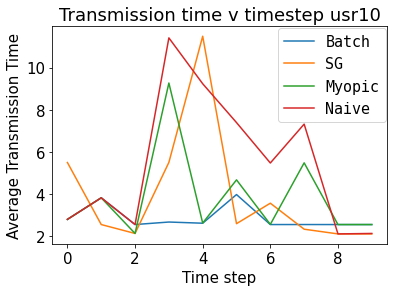

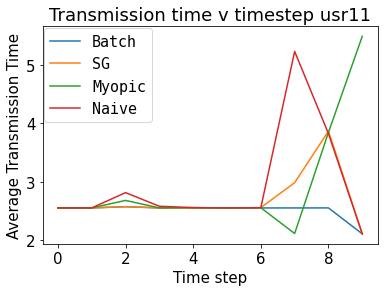

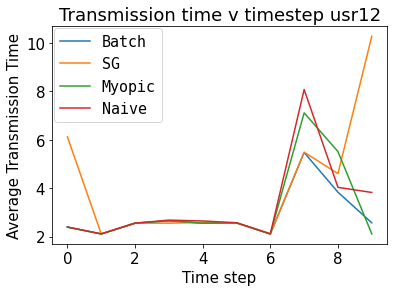

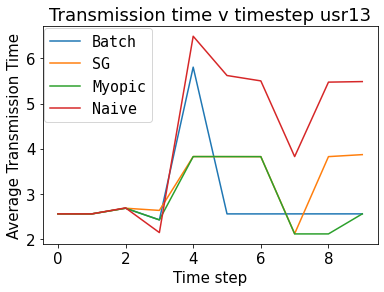

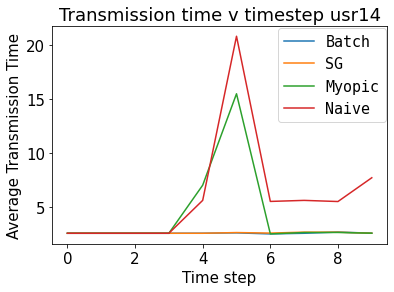

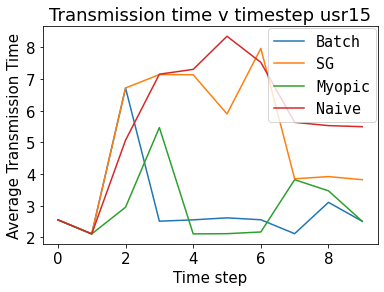

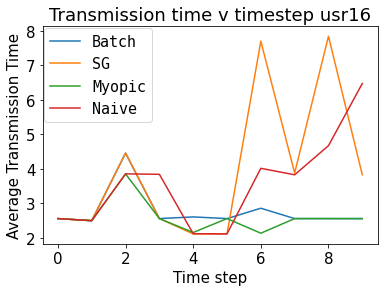

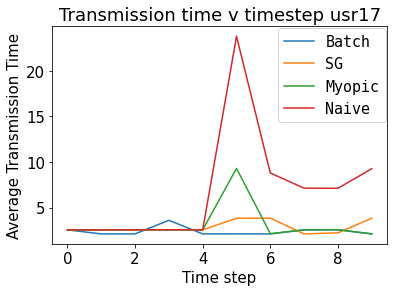

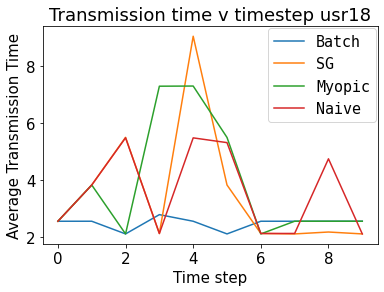

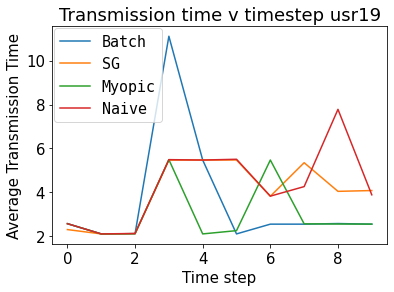

In [54]:
from matplotlib.pyplot import figure

for j in range(20):
    is_usr =  data['Unnamed: 1']==j
    data_temp = data[is_usr]

    # Get time steps
    timesteps = pd.DataFrame.to_numpy(data_temp["Plan1"])
    temp_ts = {}


    for i in range(10):
        temp_ts[i] = np.where(timesteps == i)

    plans = {}
    plans[0] = []
    plans[1] = []
    plans[2] = []
    plans[3] = []
    
    batch_seconds = pd.DataFrame.to_numpy(data_temp["Unnamed: 6"])
    SG_seconds = pd.DataFrame.to_numpy(data_temp["Unnamed: 2"])
    Myopic_seconds = pd.DataFrame.to_numpy(data_temp["Unnamed: 10"])
    Naive_seconds = pd.DataFrame.to_numpy(data_temp["Unnamed: 14"])

    seconds = {}
    seconds[0] = SG_seconds
    seconds[1] = batch_seconds
    seconds[2] = Myopic_seconds
    seconds[3] = Naive_seconds

    for p in range(4):
        for t in range(10):
            plans[p] += [np.mean(seconds[p][temp_ts[t]])]

    plt.figure()
    plt.plot(range(10), plans[1], label = 'Batch')
    plt.plot(range(10), plans[0], label = 'SG')
    plt.plot(range(10), plans[2], label = 'Myopic')
    plt.plot(range(10), plans[3], label = 'Naive')

    plt.ylabel('Average Transmission Time')
    plt.title('Transmission time v timestep usr'+ str(j))
    plt.xlabel('Time step')
    plt.legend(borderaxespad=0.1,prop={'family': 'DejaVu Sans Mono'})



In [55]:
data_temp

,Plan1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Plan2,Unnamed: 5,Unnamed: 6,Unnamed: 7,Plan3,Unnamed: 9,Unnamed: 10,Unnamed: 11,Plan4,Unnamed: 13,Unnamed: 14
19,0,19,2.30683,NaN,0,19,2.57583,NaN,0,19,2.57583,NaN,0,19,2.57583
39,1,19,2.10925,NaN,1,19,2.10925,NaN,1,19,2.10925,NaN,1,19,2.10925
59,2,19,2.12062,NaN,2,19,2.12062,NaN,2,19,2.12062,NaN,2,19,2.12862
79,3,19,5.47047,NaN,3,19,11.11050,NaN,3,19,5.49147,NaN,3,19,5.49147
99,4,19,5.47374,NaN,4,19,5.47374,NaN,4,19,2.10974,NaN,4,19,5.47374
119,5,19,5.47635,NaN,5,19,2.10935,NaN,5,19,2.25835,NaN,5,19,5.50835
139,6,19,3.82282,NaN,6,19,2.55382,NaN,6,19,5.47382,NaN,6,19,3.82982
159,7,19,5.35169,NaN,7,19,2.55369,NaN,7,19,2.56769,NaN,7,19,4.26369
179,8,19,4.04783,NaN,8,19,2.58183,NaN,8,19,2.56083,NaN,8,19,7.78183
199,9,19,4.08419,NaN,9,19,2.55319,NaN,9,19,2.55619,NaN,9,19,3.89019


### Completion Time CDF

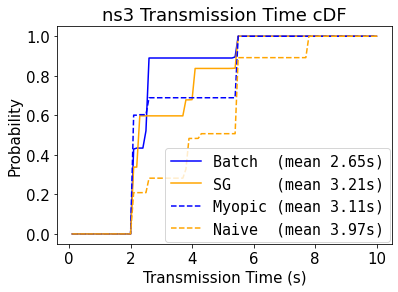

In [56]:
from matplotlib.pyplot import figure

xs = np.linspace(0.1,thresh,100)

# Batch
b_density = stats.gaussian_kde(batch_seconds)
b_xs = xs
b_density.covariance_factor = lambda : 0.01
b_density._compute_covariance()
dx = b_xs[1]-b_xs[0]
b_data = b_density(b_xs)
b_data /= (dx * b_data).sum()
b_cdf = np.cumsum(b_data* (dx))

# SG
s_density = stats.gaussian_kde(SG_seconds)
s_xs = xs
s_density.covariance_factor = lambda : 0.01
s_density._compute_covariance()

dx = s_xs[1]-s_xs[0]
s_data = s_density(s_xs)
s_data /= (dx * s_data).sum()
s_cdf = np.cumsum(s_data* (dx))

# Myopic
m_density = stats.gaussian_kde(Myopic_seconds)
m_xs = xs
m_density.covariance_factor = lambda : 0.01
m_density._compute_covariance()

dx = m_xs[1]-m_xs[0]
m_data = m_density(m_xs)
m_data /= (dx * m_data).sum()
m_cdf = np.cumsum(m_data* (dx))

# Naive
n_density = stats.gaussian_kde(Naive_seconds)
n_xs = xs
n_density.covariance_factor = lambda : 0.01
n_density._compute_covariance()

dx = n_xs[1]-n_xs[0]
n_data = n_density(n_xs)
n_data /= (dx * n_data).sum()
n_cdf = np.cumsum(n_data* (dx))


# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)


# Plot PDF
# plt.plot(b_xs, b_density(b_xs), label = 'Batch')
# plt.plot(s_xs, s_density(s_xs), label = 'SG')
# plt.plot(m_xs, m_density(m_xs), label = 'Myopic')
# plt.plot(n_xs, n_density(n_xs), label = 'Naive')

# figure(num=None, figsize=(5.5, 2.5), dpi=80, facecolor='w', edgecolor='k')


# Plot CDF
plt.plot(b_xs, b_cdf, label = 'Batch  (mean 2.65s)', color = 'blue')
plt.plot(s_xs, s_cdf, label = 'SG     (mean 3.21s)', color = 'orange')
plt.plot(m_xs, m_cdf, label = 'Myopic (mean 3.11s)', color = 'blue', linestyle='dashed')
plt.plot(n_xs, n_cdf, label = 'Naive  (mean 3.97s)', color = 'orange', linestyle='dashed')
# plt.xscale('log')

plt.ylabel('Probability')
plt.title('ns3 Transmission Time cDF')
plt.xlabel('Transmission Time (s)')
plt.legend(borderaxespad=0.1,loc = "lower right",prop={'family': 'DejaVu Sans Mono'})


# plt.ylim(-.3,1)
plt.show()